In [1]:
import pandas as pd
from os.path import isfile, join
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scp

C:\Users\Asus\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
datafiles = [join('.\\data', f) for f in listdir('./data') if join('./data', f).endswith(".csv")]

In [3]:
counter = 0
frames = []
IDs = []
for f in datafiles:
    
    if "end_part2_text.started" in pd.read_csv(f):
        df = pd.read_csv(f, converters={'PID': str})
        IDs.append(df["PID"][0])
        frames.append(df)
        counter += 1
print('Number of finished experiments', counter)

Number of finished experiments 3


In [ ]:
# trial_type : Guess or Read
# guess_reached.keys : how many guesses (fgh) 0-1-More
# recall_reached.keys : do they recall or not (fg) No - Yes
# recall_selection.key : which letter they chose (just added saving which is which)
# recall_selection.rt : check how long it takes for them generally to select
# living_nonliving.keys : (fg) living/nonliving
# living_nonliving.rt

In [4]:
all_trials = pd.concat(frames,  ignore_index = True).filter(["PID", "Alter", "Geschlecht", "date", "cue", "target", "list_item", 
                                      "trial_type", "guess_reached.keys",
                                       "test_trials.thisIndex",
                                      "recall_reached.keys", "recall_reached.rt",
                                       "recall_selection.keys", "recall_selection.rt"])
all_trials["recalled"] = (all_trials["recall_reached.keys"] == 3)
all_trials.loc[all_trials["PID"]=="pilot1", "recalled"] = (all_trials["recall_reached.keys"] == 2)

In [5]:
recall = all_trials.loc[all_trials["test_trials.thisIndex"] >= 0]
recall

,PID,Alter,date,cue,target,trial_type,guess_reached.keys,test_trials.thisIndex,recall_reached.keys,recall_reached.rt,recall_selection.keys,recall_selection.rt,recalled
99,Guess_3415,NaN,2025-05-07_18h18.40.789,NaN,NaN,Guess,NaN,0.0,NaN,NaN,NaN,NaN,False
100,Guess_3415,NaN,2025-05-07_18h18.40.789,NaN,NaN,Guess,NaN,0.0,3.0,1.035148,NaN,NaN,True
101,Guess_3415,NaN,2025-05-07_18h18.40.789,NaN,NaN,Read,NaN,0.0,2.0,0.883447,NaN,NaN,False
102,Guess_3415,NaN,2025-05-07_18h18.40.789,NaN,NaN,Read,NaN,0.0,3.0,0.511393,2.0,1.105077,True
103,Guess_3415,NaN,2025-05-07_18h18.40.789,NaN,NaN,Guess,NaN,0.0,3.0,1.072085,3.0,1.102895,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,0.0,3.0,1.134612,2.0,1.288428,True
541,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,0.0,3.0,1.027452,4.0,1.070106,True
542,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,0.0,2.0,0.411473,NaN,NaN,False
543,pilot2,NaN,2025-04-22_13h19.30.422,NaN,NaN,Read,NaN,0.0,3.0,0.901641,3.0,0.989686,True


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


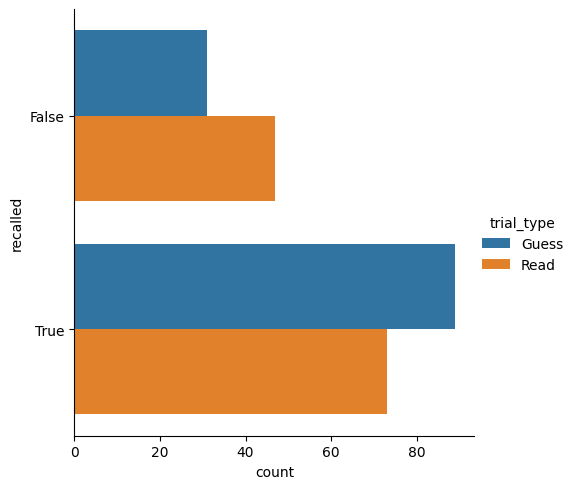

In [6]:
sns.catplot(data = recall, y = "recalled", kind="count", hue="trial_type")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


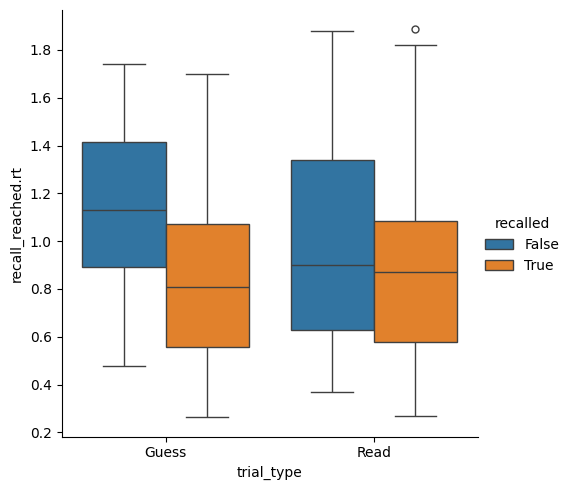

In [7]:
sns.catplot(data = recall, hue = "recalled", kind="box", x="trial_type", y = "recall_reached.rt")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


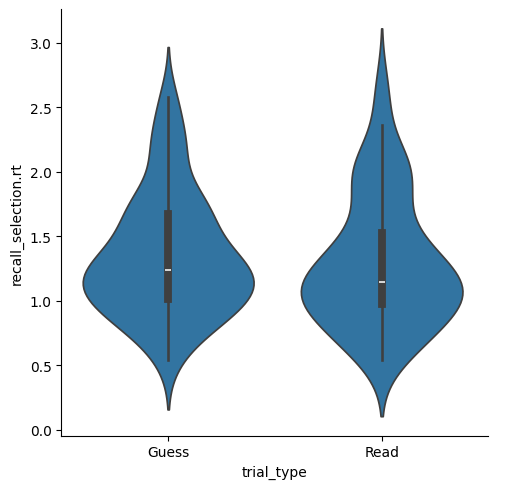

In [8]:
sns.catplot(data = recall, kind = "violin", x="trial_type", y = "recall_selection.rt")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


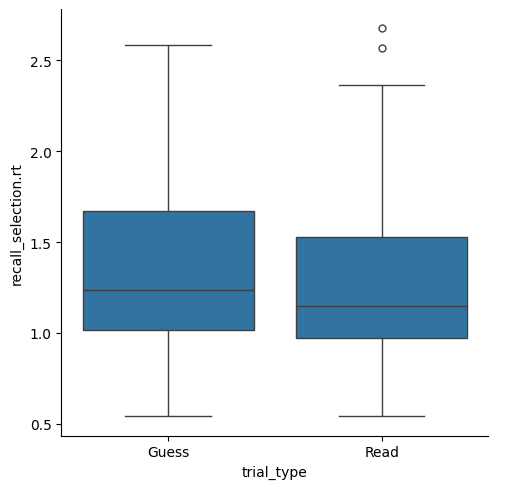

In [9]:
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", kind='box')

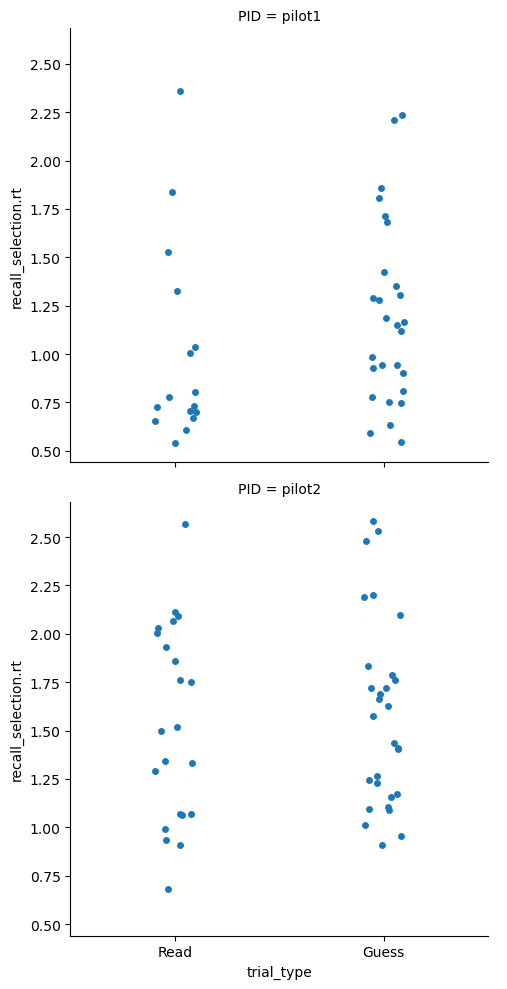

In [21]:
# Note: participant 879824 did not use the numeric keys, but the actual letter keys to select the last letter
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", row="PID")

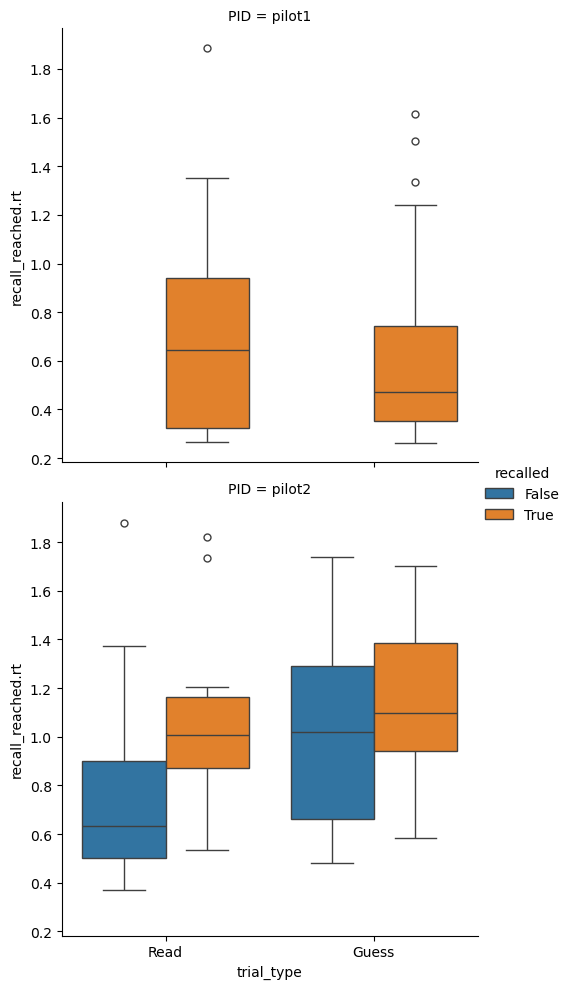

In [47]:
sns.catplot(data = recall, hue = "recalled", kind="box", x="trial_type", y = "recall_reached.rt", row="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


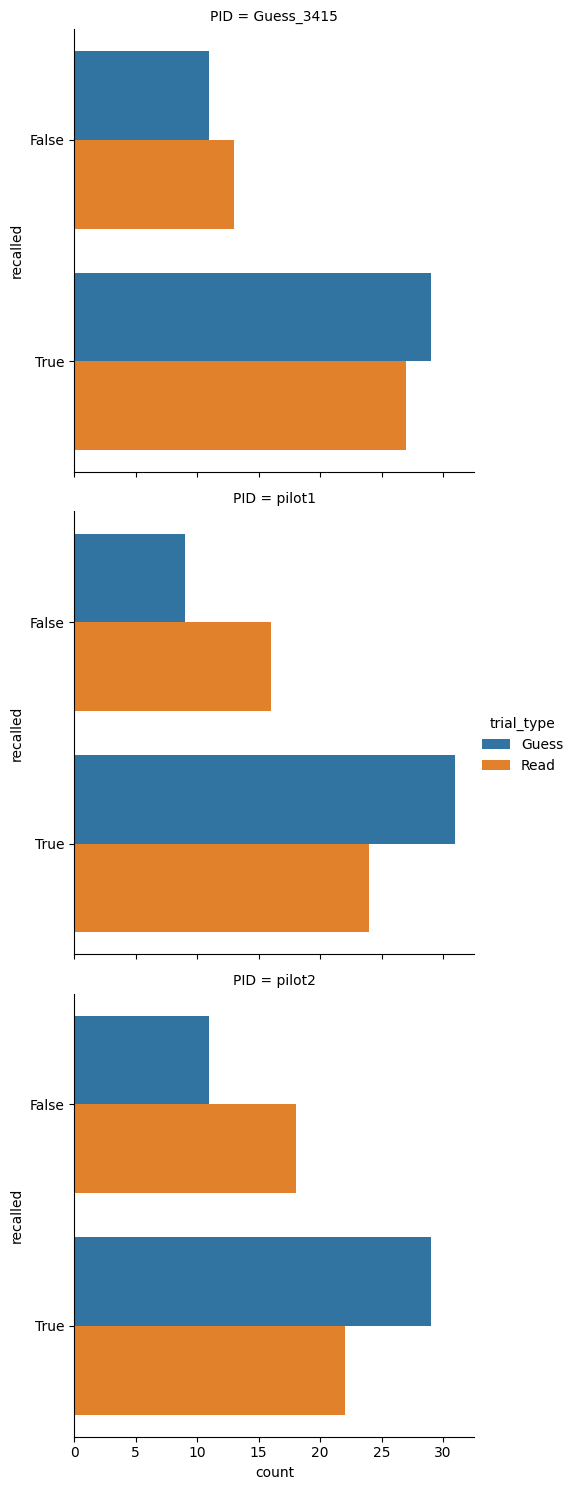

In [10]:
sns.catplot(data = recall, y = "recalled", kind="count", hue="trial_type", row='PID')

In [11]:
recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['recalled']], normalize='index')
recall_sum

trial_type   Guess            Read        
recalled     False   True    False   True 
PID                                       
Guess_3415  0.1375  0.3625  0.1625  0.3375
pilot1      0.1125  0.3875  0.2000  0.3000
pilot2      0.1375  0.3625  0.2250  0.2750

In [12]:
scp.ttest_rel(recall_sum['Guess'][True], recall_sum['Read'][True])

TtestResult(statistic=3.199999999999998, pvalue=0.08534087923995294, df=2)